# Exercise Chapter 7 
Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import warnings
import mistat
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Uncomment the following if xgboost crashes
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# Exercise 2

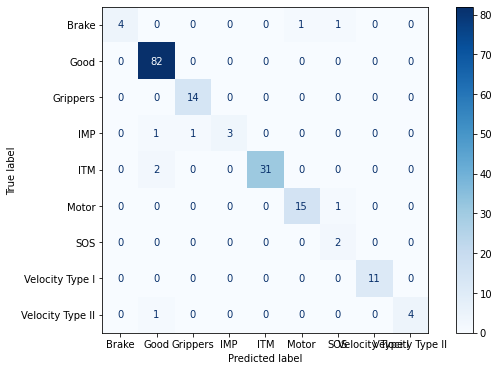

In [3]:
sensors = mistat.load_data('SENSORS.csv')
predictors = [c for c in sensors.columns if c.startswith('sensor')]
outcome = 'testResult'
X = sensors[predictors]
y = sensors[outcome]

# Train the model
clf = DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 6))
ConfusionMatrixDisplay.from_estimator(clf, X, y, ax=ax, cmap=plt.cm.Blues)

plt.show()

# Exercise 3

In [4]:
# convert the status information into numerical labels
outcome = 'status'
y = sensors[outcome].replace({'Pass': 1, 'Fail': 0})

# Train the model
xgb = XGBClassifier(objective='binary:logistic', subsample=.63,
                    eval_metric='logloss', use_label_encoder=False,
                    seed=1)
xgb.fit(X, y)

# actual in rows / predicted in columns
print('Confusion matrix')
print(confusion_matrix(y, xgb.predict(X)))

Confusion matrix
[[92  0]
 [ 0 82]]


In [5]:
var_imp = pd.DataFrame({
  'importance': xgb.feature_importances_,
  }, index=predictors)
var_imp = var_imp.sort_values(by='importance', ascending=False)
var_imp['order'] = range(1, len(var_imp) + 1)
print(var_imp.head(10))
var_imp.loc[var_imp.index.isin(['sensor18', 'sensor07', 'sensor21'])]

          importance  order
sensor18    0.290473      1
sensor54    0.288680      2
sensor53    0.105831      3
sensor55    0.062423      4
sensor61    0.058112      5
sensor48    0.040433      6
sensor07    0.026944      7
sensor12    0.015288      8
sensor03    0.013340      9
sensor52    0.013160     10


,importance,order
sensor18,0.290473,1
sensor07,0.026944,7
sensor21,0.000000,50


# Exercise 4

In [6]:
y = sensors['status']

# Train the model
model = RandomForestClassifier(ccp_alpha=0.012, random_state=0)
model.fit(X, y)

# actual in rows / predicted in columns
print('Confusion matrix')
print(confusion_matrix(y, model.predict(X)))

Confusion matrix
[[92  0]
 [ 0 82]]


In [7]:
var_imp = pd.DataFrame({
  'importance': model.feature_importances_,
  }, index=predictors)
var_imp = var_imp.sort_values(by='importance', ascending=False)
var_imp['order'] = range(1, len(var_imp) + 1)
print(var_imp.head(10))
var_imp.loc[var_imp.index.isin(['sensor18', 'sensor07', 'sensor21'])]

          importance  order
sensor61    0.138663      1
sensor18    0.100477      2
sensor53    0.079890      3
sensor52    0.076854      4
sensor46    0.052957      5
sensor50    0.051970      6
sensor44    0.042771      7
sensor48    0.037087      8
sensor24    0.036825      9
sensor21    0.035014     10


,importance,order
sensor18,0.100477,2
sensor21,0.035014,10
sensor07,0.023162,17


# Exercise 5

In [8]:
# convert outcome values from strings into numerical labels
# use le.inverse_transform to convert the predictions to strings
le = LabelEncoder()
y = le.fit_transform(sensors['status'])

train_X, valid_X, train_y, valid_y = train_test_split(X, y,
  test_size=0.4, random_state=2)

dt_model = DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)
dt_model.fit(train_X, train_y)

xgb_model = XGBClassifier(objective='binary:logistic', subsample=.63,
                  eval_metric='logloss', use_label_encoder=False,
                  seed=1)
xgb_model.fit(train_X, train_y)

rf_model = RandomForestClassifier(ccp_alpha=0.014, random_state=0)
rf_model.fit(train_X, train_y)

print('Decision tree model')
print(f'Accuracy {accuracy_score(valid_y, dt_model.predict(valid_X)):.3f}')
print(confusion_matrix(valid_y, dt_model.predict(valid_X)))

print('Gradient boosting model')
print(f'Accuracy {accuracy_score(valid_y, xgb_model.predict(valid_X)):.3f}')
print(confusion_matrix(valid_y, xgb_model.predict(valid_X)))

print('Random forest model')
print(f'Accuracy {accuracy_score(valid_y, rf_model.predict(valid_X)):.3f}')
print(confusion_matrix(valid_y, rf_model.predict(valid_X)))

Decision tree model
Accuracy 0.900
[[37  2]
 [ 5 26]]
Gradient boosting model
Accuracy 0.957
[[36  3]
 [ 0 31]]
Random forest model
Accuracy 0.986
[[38  1]
 [ 0 31]]


# Exercise 6

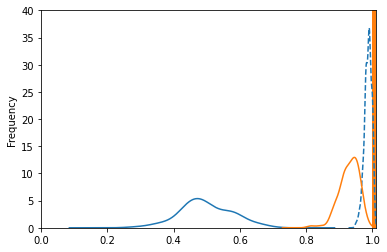

In [9]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.012)

random_valid_acc = []
random_train_acc = []
org_valid_acc = []
org_train_acc = []
for _ in range(100):
  train_X, valid_X, train_y, valid_y = train_test_split(X, y,
    test_size=0.4)
  dt_model.fit(train_X, train_y)
  org_train_acc.append(accuracy_score(train_y, dt_model.predict(train_X)))
  org_valid_acc.append(accuracy_score(valid_y, dt_model.predict(valid_X)))

  random_y = random.sample(list(train_y), len(train_y))
  dt_model.fit(train_X, random_y)
  random_train_acc.append(accuracy_score(random_y, dt_model.predict(train_X)))
  random_valid_acc.append(accuracy_score(valid_y, dt_model.predict(valid_X)))

ax = pd.Series(random_valid_acc).plot.density(color='C0')
pd.Series(random_train_acc).plot.density(color='C0', linestyle='--',
                                      ax=ax)
pd.Series(org_valid_acc).plot.density(color='C1', ax=ax)
pd.Series(org_train_acc).plot.hist(color='C1', linestyle='--',
                                   ax=ax)
ax.set_ylim(0, 40)
ax.set_xlim(0, 1.01)
plt.show()

# Exercise 7

In [10]:
distTower = mistat.load_data('DISTILLATION-TOWER.csv')
predictors = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6',
              'Temp7', 'Temp8', 'Temp9', 'Temp10', 'Temp11', 'Temp12']
outcome = 'VapourPressure'
Xr = distTower[predictors]
yr = distTower[outcome]

In [11]:
train_X, valid_X, train_y, valid_y = train_test_split(Xr, yr,
  test_size=0.2, random_state=2)

In [12]:
# Code to analyze tree depth vs alpha
model = DecisionTreeRegressor(random_state=0)
path = model.cost_complexity_pruning_path(Xr, yr)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
mse = []
mse_train = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(train_X, train_y)
    mse.append(mean_squared_error(valid_y, model.predict(valid_X)))
    mse_train.append(mean_squared_error(train_y, model.predict(train_X)))
ccp_alpha = ccp_alphas[np.argmin(mse)]

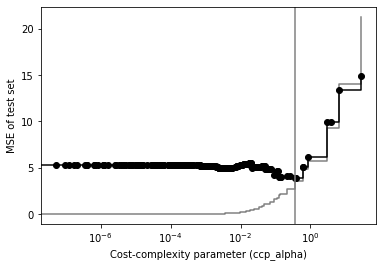

In [13]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, mse_train, drawstyle='steps-post', color='grey')
ax.plot(ccp_alphas, mse, marker='o', drawstyle="steps-post",
        color='black')
ax.set_xlabel("Cost-complexity parameter (ccp_alpha)")
ax.set_ylabel("MSE of test set")
ax.set_xscale('log')
ax.axvline(ccp_alpha, color='grey')
plt.show()

In [14]:
from dtreeviz.trees import dtreeviz

def viz2pdf(viz, pdfFile):
  from svglib.svglib import svg2rlg
  from reportlab.graphics import renderPDF
  from tempfile import NamedTemporaryFile
  with NamedTemporaryFile(mode='w+', suffix='.svg') as f:
    f.write(viz.svg())
    f.flush()
    f.seek(0)
    drawing = svg2rlg(f.name)
    renderPDF.drawToFile(drawing, pdfFile)

In [15]:
# Ignore user warning thrown here
warnings.filterwarnings('ignore', category=UserWarning)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


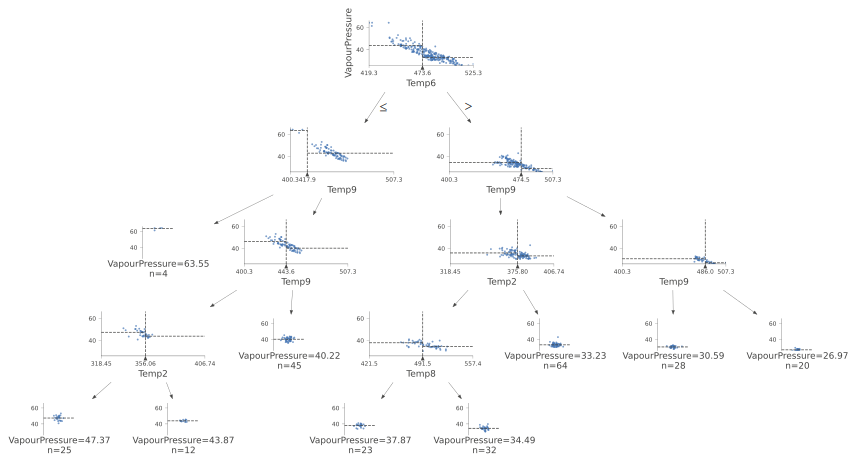

In [16]:
# the dtreeviz methods requires the classifier to be trained with a numerical
# representation of the classes
# Train the model
model = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=0)
model.fit(Xr, yr)

viz = dtreeviz(model, Xr, yr,
               target_name=outcome,
               feature_names=Xr.columns)
viz

In [17]:
# Ignore user warning thrown here
warnings.filterwarnings('default', category=UserWarning)

# Exercise 9

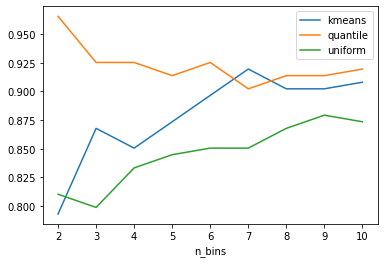

In [18]:
y = sensors['status']

results = []
for strategy in 'uniform', 'quantile', 'kmeans':
  for n_bins in range(2, 11):
    kbinsDiscretizer = KBinsDiscretizer(encode='ordinal',
      strategy=strategy, n_bins=n_bins)
    X_binned = kbinsDiscretizer.fit_transform(X)
    nb_model = MultinomialNB()
    nb_model.fit(X_binned, y)
    results.append({'strategy': strategy, 'n_bins': n_bins,
       'accuracy': accuracy_score(y, nb_model.predict(X_binned))})
results = pd.DataFrame(results)
fig, ax = plt.subplots()
for key, group in results.groupby('strategy'):
  group.plot(x='n_bins', y='accuracy', label=key, ax=ax)

In [19]:
kbinsDiscretizer = KBinsDiscretizer(encode='ordinal',
  strategy='quantile', n_bins=2)
X_binned = kbinsDiscretizer.fit_transform(X)
nb_model = MultinomialNB()
nb_model.fit(X_binned, y)
print('Confusion matrix')
print(confusion_matrix(y, nb_model.predict(X_binned)))

Confusion matrix
[[87  5]
 [ 1 81]]


# Exercise 10

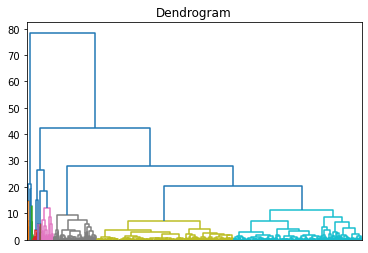

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from mistat import plot_dendrogram

food = mistat.load_data('FOOD.csv')

scaler = StandardScaler()
model = AgglomerativeClustering(n_clusters=10, compute_distances=True)

X = scaler.fit_transform(food)
model = model.fit(X)
fig, ax = plt.subplots()
plot_dendrogram(model, ax=ax)
ax.set_title('Dendrogram')
ax.get_xaxis().set_ticks([])
plt.show()

# Exercise 11

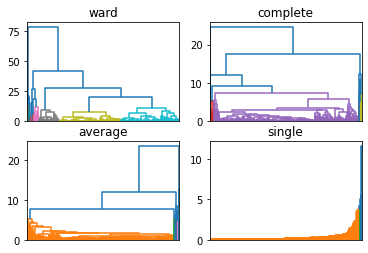

In [21]:
food = mistat.load_data('FOOD.csv')
scaler = StandardScaler()
X = scaler.fit_transform(food)

fig, axes = plt.subplots(ncols=2, nrows=2)

for linkage, ax in zip(['ward', 'complete', 'average', 'single'], axes.flatten()):
  model = AgglomerativeClustering(n_clusters=10, compute_distances=True,
    linkage=linkage)
  model = model.fit(X)
  plot_dendrogram(model, ax=ax)
  ax.set_title(linkage)
  ax.get_xaxis().set_ticks([])
plt.show()

# Exercise 12

In [22]:
sensors = mistat.load_data('SENSORS.csv')
predictors = [c for c in sensors.columns if c.startswith('sensor')]
outcome = 'status'
X = sensors[predictors]

scaler = StandardScaler()
X = scaler.fit_transform(X)
model = KMeans(n_clusters=10, random_state=1).fit(X)

In [23]:
df = pd.DataFrame({
  'status': sensors['status'],
  'testResult': sensors['testResult'],
  'cluster': model.predict(X),
})

for status, group in df.groupby('status'):
  print(f'Status {status}')
  print(group['cluster'].value_counts())

Status Fail
8    19
0    15
4    13
1    13
9    13
3    10
5     5
7     2
6     1
2     1
Name: cluster, dtype: int64
Status Pass
1    48
8    34
Name: cluster, dtype: int64


In [24]:
print('Number of clusters by testResult')
for cluster, group in df.groupby('cluster'):
  print(f'Cluster {cluster}')
  print(group['testResult'].value_counts())
  print()

Number of clusters by testResult
Cluster 0
ITM    15
Name: testResult, dtype: int64

Cluster 1
Good        48
Brake        6
IMP          4
Grippers     1
Motor        1
ITM          1
Name: testResult, dtype: int64

Cluster 2
SOS    1
Name: testResult, dtype: int64

Cluster 3
Velocity Type I    10
Name: testResult, dtype: int64

Cluster 4
Grippers    10
ITM          3
Name: testResult, dtype: int64

Cluster 5
Velocity Type II    5
Name: testResult, dtype: int64

Cluster 6
SOS    1
Name: testResult, dtype: int64

Cluster 7
Grippers    2
Name: testResult, dtype: int64

Cluster 8
Good               34
Motor              15
Grippers            1
IMP                 1
ITM                 1
Velocity Type I     1
Name: testResult, dtype: int64

Cluster 9
ITM    13
Name: testResult, dtype: int64



# Exercise 13

In [25]:
# Data preparation
sensors = mistat.load_data('SENSORS.csv')
predictors = [c for c in sensors.columns if c.startswith('sensor')]
outcome = 'status'
X = sensors[predictors]
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = sensors[outcome]

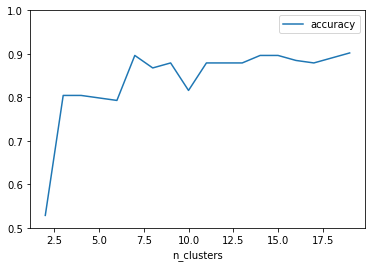

,n_clusters,accuracy
0,2,0.529
1,3,0.805
2,4,0.805
3,5,0.799
4,6,0.793
5,7,0.897
6,8,0.868
7,9,0.879
8,10,0.816
9,11,0.879


In [26]:
# Iterate over increasing number of clusters
results = []
clf = DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)
for n_clusters in range(2, 20):
  # fit a model and assign the data to clusters
  model = KMeans(n_clusters=n_clusters, random_state=1)
  model.fit(X)
  Xcluster = model.predict(X)
  # to use the cluster number in a classifier, use one-hot encoding
  # it's necessary to reshape the vector of cluster numbers into a column vector
  Xcluster = OneHotEncoder().fit_transform(Xcluster.reshape(-1, 1))

  # create a decision tree model and determine the accuracy
  clf.fit(Xcluster, y)
  results.append({'n_clusters': n_clusters,
                  'accuracy': accuracy_score(y, clf.predict(Xcluster))})
ax = pd.DataFrame(results).plot(x='n_clusters', y='accuracy')
ax.set_ylim(0.5, 1)
plt.show()
pd.DataFrame(results).round(3)

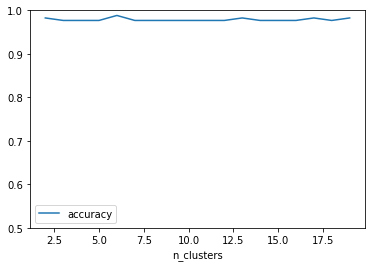

,n_clusters,accuracy
0,2,0.983
1,3,0.977
2,4,0.977
3,5,0.977
4,6,0.989
5,7,0.977
6,8,0.977
7,9,0.977
8,10,0.977
9,11,0.977


In [27]:
results = []
clf = DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)
for n_clusters in range(2, 20):
  # fit a model and convert data to distances
  model = KMeans(n_clusters=n_clusters, random_state=1)
  model.fit(X)
  Xcluster = model.transform(X)

  # create a decision tree model and determine the accuracy
  clf.fit(Xcluster, y)
  results.append({'n_clusters': n_clusters,
                  'accuracy': accuracy_score(y, clf.predict(Xcluster))})
ax = pd.DataFrame(results).plot(x='n_clusters', y='accuracy')
ax.set_ylim(0.5, 1)
plt.show()
pd.DataFrame(results).round(3)

In [28]:
pipeline = make_pipeline(
  StandardScaler(),
  KMeans(n_clusters=6, random_state=1),
  DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)
)
X = sensors[predictors]
y = sensors[outcome]

process = pipeline.fit(X, y)
print('accuracy', accuracy_score(y, process.predict(X)))
print('Confusion matrix')
print(confusion_matrix(y, process.predict(X)))

accuracy 0.9885057471264368
Confusion matrix
[[91  1]
 [ 1 81]]
